In [1]:
# Installing the Requirements

#!pip install pandas
#!pip install numpy
#!pip install spacy
#!pip install -U scikit-learn
#!pip install  nltk
#import nltk
#nltk.download()

In [8]:
import numpy as np 
import pandas as pd 
import re 
import pickle
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import SnowballStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report


In [9]:
import os
os.getcwd()

'/home/ajay/Desktop/Movie_Review_Pragya'

In [10]:
os.chdir("/home/ajay/Desktop/Movie_Review_Pragya")
import spacy

In [11]:
## 1 | Data Preprocessing ##
"""Prepare the dataset before training"""

# Load dataset
dataset = pd.read_csv('IMDB.csv')
print(f"Dataset shape : {dataset.shape}\n")
print(f"Dataset head : \n{dataset.head()}\n")


Dataset shape : (50000, 2)

Dataset head : 
                                              review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there's a family where a little boy ...  negative
4  Petter Mattei's "Love in the Time of Money" is...  positive



In [12]:
# 1.2 Output counts
print(f"Dataset output counts:\n{dataset.sentiment.value_counts()}\n")


Dataset output counts:
sentiment
positive    25000
negative    25000
Name: count, dtype: int64



In [13]:
# 1.3 Encode output column into binary
dataset.sentiment.replace('positive', 1, inplace=True)
dataset.sentiment.replace('negative', 0, inplace=True)
print(f"Dataset head after encoding :\n{dataset.head(10)}\n")


Dataset head after encoding :
                                              review  sentiment
0  One of the other reviewers has mentioned that ...          1
1  A wonderful little production. <br /><br />The...          1
2  I thought this was a wonderful way to spend ti...          1
3  Basically there's a family where a little boy ...          0
4  Petter Mattei's "Love in the Time of Money" is...          1
5  Probably my all-time favorite movie, a story o...          1
6  I sure would like to see a resurrection of a u...          1
7  This show was an amazing, fresh & innovative i...          0
8  Encouraged by the positive comments about this...          0
9  If you like original gut wrenching laughter yo...          1



Text(0, 0.5, 'Count')

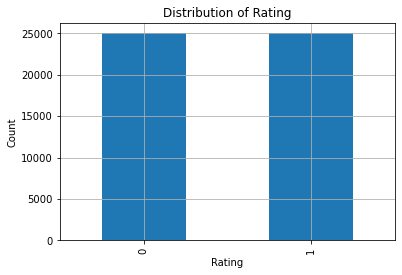

In [14]:

import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

dataset['sentiment'].value_counts().sort_index().plot(kind='bar')
plt.title('Distribution of Rating')
plt.grid()
plt.xlabel('Rating')
plt.ylabel('Count')



In [15]:
## 2 | Data cleaning ##
"""Clean dataset reviews as following:
1. Remove HTML tags
2. Remove special characters
3. Convert everything to lowercase
4. Remove stopwords
5. Stemming
"""

'Clean dataset reviews as following:\n1. Remove HTML tags\n2. Remove special characters\n3. Convert everything to lowercase\n4. Remove stopwords\n5. Stemming\n'

In [16]:
#1 Remove HTML tags
def clean(text):
    cleaned = re.compile(r'<.*?>')
    return re.sub(cleaned,'',text)

dataset.review = dataset.review.apply(clean)
print(f"Review sample after removing HTML tags : \n\n{dataset.review[0]}\n")


Review sample after removing HTML tags : 

One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.I would say the main appeal of the show is due to 

In [17]:
# 2.2 Remove special characters
def is_special(text):
    rem = ''
    for i in text:
        if i.isalnum():
            rem = rem + i
        else:
            rem = rem + ' '
    return rem

dataset.review = dataset.review.apply(is_special)
print(f"Review sample after removing special characters : \n\n{dataset.review[0]}\n")


Review sample after removing special characters : 

One of the other reviewers has mentioned that after watching just 1 Oz episode you ll be hooked  They are right  as this is exactly what happened with me The first thing that struck me about Oz was its brutality and unflinching scenes of violence  which set in right from the word GO  Trust me  this is not a show for the faint hearted or timid  This show pulls no punches with regards to drugs  sex or violence  Its is hardcore  in the classic use of the word It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary  It focuses mainly on Emerald City  an experimental section of the prison where all the cells have glass fronts and face inwards  so privacy is not high on the agenda  Em City is home to many  Aryans  Muslims  gangstas  Latinos  Christians  Italians  Irish and more    so scuffles  death stares  dodgy dealings and shady agreements are never far away I would say the main appeal of the show i

In [18]:
# 2.3 Convert everything to lowercase
def to_lower(text):
    return text.lower()

dataset.review = dataset.review.apply(to_lower)
print(f"Review sample after converting everything to lowercase :\n \n{dataset.review[0]}\n")


Review sample after converting everything to lowercase :
 
one of the other reviewers has mentioned that after watching just 1 oz episode you ll be hooked  they are right  as this is exactly what happened with me the first thing that struck me about oz was its brutality and unflinching scenes of violence  which set in right from the word go  trust me  this is not a show for the faint hearted or timid  this show pulls no punches with regards to drugs  sex or violence  its is hardcore  in the classic use of the word it is called oz as that is the nickname given to the oswald maximum security state penitentary  it focuses mainly on emerald city  an experimental section of the prison where all the cells have glass fronts and face inwards  so privacy is not high on the agenda  em city is home to many  aryans  muslims  gangstas  latinos  christians  italians  irish and more    so scuffles  death stares  dodgy dealings and shady agreements are never far away i would say the main appeal of the

In [19]:
#2.4 Remove stopwords
def rem_stopwords(text):
    stop_words = set(stopwords.words('english'))
    words = word_tokenize(text)
    return [w for w in words if w not in stop_words]

dataset.review = dataset.review.apply(rem_stopwords)
print(f"Review sample after removing stopwords : \n\n{dataset.review[0]}\n")


Review sample after removing stopwords : 

['one', 'reviewers', 'mentioned', 'watching', '1', 'oz', 'episode', 'hooked', 'right', 'exactly', 'happened', 'first', 'thing', 'struck', 'oz', 'brutality', 'unflinching', 'scenes', 'violence', 'set', 'right', 'word', 'go', 'trust', 'show', 'faint', 'hearted', 'timid', 'show', 'pulls', 'punches', 'regards', 'drugs', 'sex', 'violence', 'hardcore', 'classic', 'use', 'word', 'called', 'oz', 'nickname', 'given', 'oswald', 'maximum', 'security', 'state', 'penitentary', 'focuses', 'mainly', 'emerald', 'city', 'experimental', 'section', 'prison', 'cells', 'glass', 'fronts', 'face', 'inwards', 'privacy', 'high', 'agenda', 'em', 'city', 'home', 'many', 'aryans', 'muslims', 'gangstas', 'latinos', 'christians', 'italians', 'irish', 'scuffles', 'death', 'stares', 'dodgy', 'dealings', 'shady', 'agreements', 'never', 'far', 'away', 'would', 'say', 'main', 'appeal', 'show', 'due', 'fact', 'goes', 'shows', 'dare', 'forget', 'pretty', 'pictures', 'painted', 'm

In [20]:
# 2.5 Stem the words
def stem_txt(text):
    ss = SnowballStemmer('english')
    return " ".join([ss.stem(w) for w in text])

dataset.review = dataset.review.apply(stem_txt)
print(f"Review sample after stemming the words : \n\n{dataset.review[0]}\n")


Review sample after stemming the words : 

one review mention watch 1 oz episod hook right exact happen first thing struck oz brutal unflinch scene violenc set right word go trust show faint heart timid show pull punch regard drug sex violenc hardcor classic use word call oz nicknam given oswald maximum secur state penitentari focus main emerald citi experiment section prison cell glass front face inward privaci high agenda em citi home mani aryan muslim gangsta latino christian italian irish scuffl death stare dodgi deal shadi agreement never far away would say main appeal show due fact goe show dare forget pretti pictur paint mainstream audienc forget charm forget romanc oz mess around first episod ever saw struck nasti surreal say readi watch develop tast oz got accustom high level graphic violenc violenc injustic crook guard sold nickel inmat kill order get away well manner middl class inmat turn prison bitch due lack street skill prison experi watch oz may becom comfort uncomfort 

In [21]:
## 3 | Model Creation ##
"""Create model to fit it to the data"""

# 3.1 Creating Bag Of Words (BOW)
X = np.array(dataset.iloc[:,0].values)
y = np.array(dataset.sentiment.values)

tfidf = TfidfVectorizer()
X = tfidf.fit_transform(X)
print(f"=== Bag of words ===\n")
print(f"BOW X shape : {X.shape}")
print(f"BOW y shape : {y.shape}\n")


=== Bag of words ===

BOW X shape : (50000, 72648)
BOW y shape : (50000,)



In [22]:
# 3.2 Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=9)
print(f"Train shapes : X = {X_train.shape}, y = {y_train.shape}")
print(f"Test shapes  : X = {X_test.shape},  y = {y_test.shape}\n")


Train shapes : X = (35000, 72648), y = (35000,)
Test shapes  : X = (15000, 72648),  y = (15000,)



In [25]:
pickle.dump(tfidf,open('/home/ajay/Desktop/Movie_Review_Pragya/saved_model/tfidf.pkl','wb'))
print('TF-IDF Vector Model Saved')

TF-IDF Vector Model Saved


In [23]:
#Logistic Regression

from sklearn import linear_model

LRmodel = linear_model.LogisticRegression()
# Train the Model
LRmodel.fit(X_train,y_train)   
LRpred = LRmodel.predict(X_test)
print(f'Confusion Matrix:\n{confusion_matrix(y_test,LRpred)}')
print(f'\nClassification Report:\n{classification_report(y_test,LRpred)}')
print(f'Accuracy: {accuracy_score(y_test,LRpred)*100}%')
pickle.dump(LRmodel, open('/home/ajay/Desktop/Movie_Review_Pragya/saved_model/LinearRegression_model.pkl', 'wb'))
print('Logistic Regression trained Model Saved')

Confusion Matrix:
[[6605  920]
 [ 706 6769]]

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.88      0.89      7525
           1       0.88      0.91      0.89      7475

    accuracy                           0.89     15000
   macro avg       0.89      0.89      0.89     15000
weighted avg       0.89      0.89      0.89     15000

Accuracy: 89.16%
Logistic Regression trained Model Saved


In [36]:
LRmodel.predict(tfidf.transform(['American Psycho not good , they were fake']))

array([0])